In [ ]:
# IMPORTING REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud , STOPWORDS
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import re
import plotly.express as px
from textblob import TextBlob


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
a = "/content/drive/MyDrive/Indian-Resturants.csv"
df = pd.read_csv(a)

In [ ]:
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


# **DATA OVERVIEW**

In [ ]:
df.shape

(211944, 26)

In [ ]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(60417, 26)

In [ ]:
df.drop(['zipcode'],axis=1,inplace=True)

In [ ]:
df.isnull().sum().sum()

1577

In [ ]:
df.isnull().sum()

,0
res_id,0
name,0
establishment,0
url,0
address,18
city,0
city_id,0
locality,0
latitude,0
longitude,0


<Axes: >

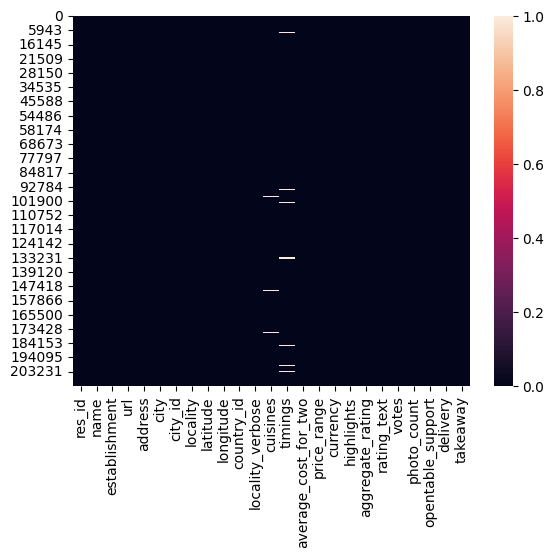

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
# Filling missing values
df['cuisines'].fillna('Unknown',inplace=True)
df['timings'].fillna('Not available',inplace=True)
df['opentable_support'].fillna(0,inplace=True)
df['address'].fillna('Not available',inplace=True)


<Axes: >

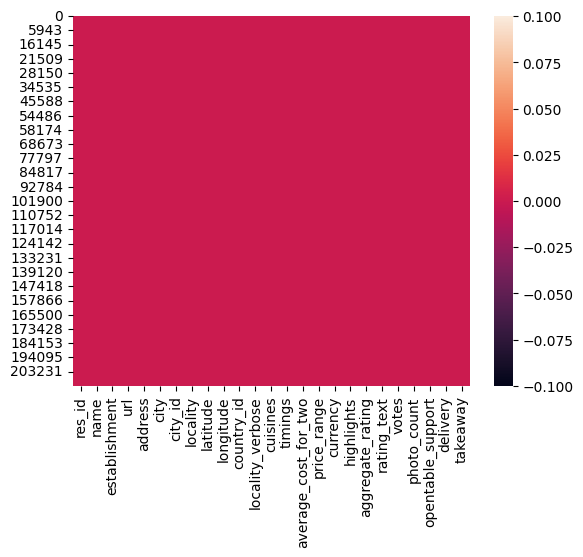

In [ ]:
sns.heatmap(df.isnull())

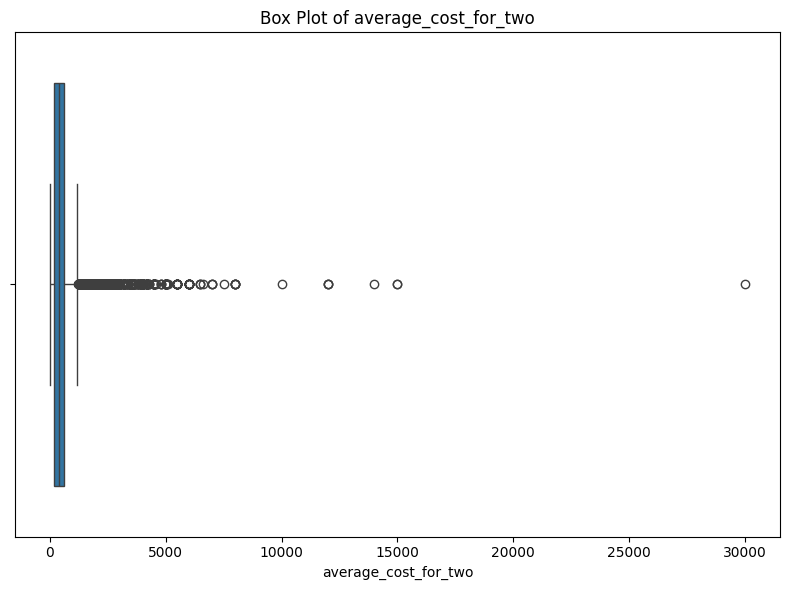

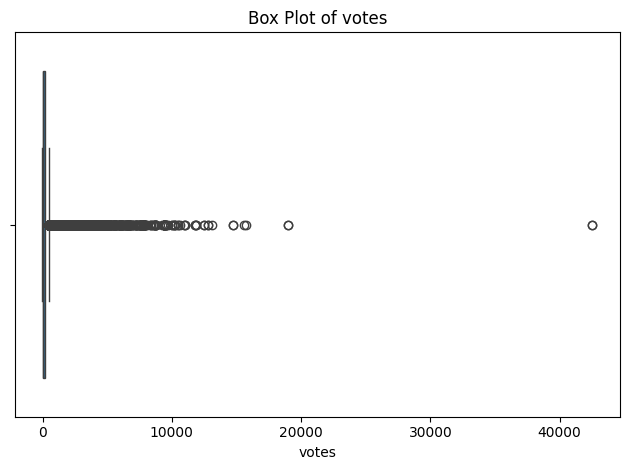

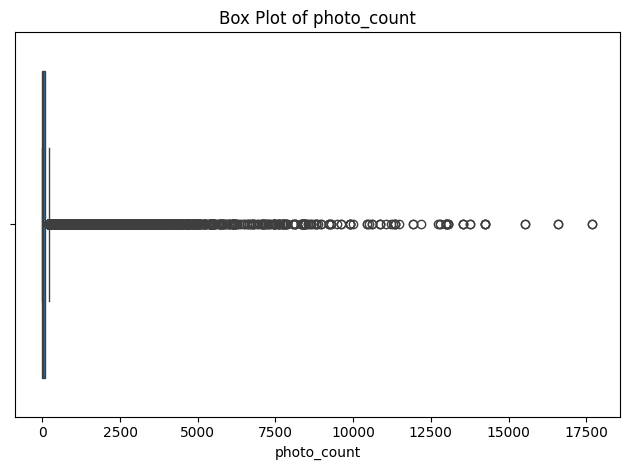

In [ ]:
# Checking if there is any outliers present in the numerical columns
column = ['average_cost_for_two','votes','photo_count']
plt.figure(figsize=(8, 6))
for col in column:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

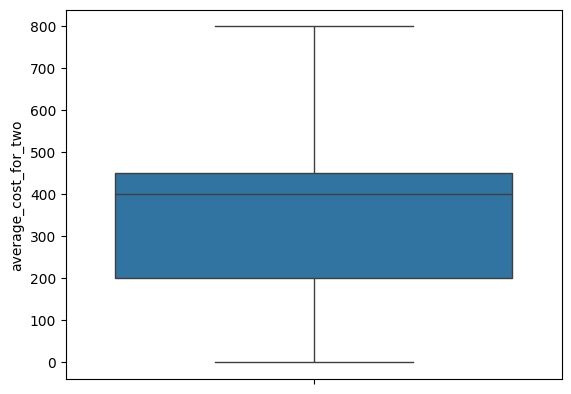

In [ ]:
Q1 = df['average_cost_for_two'].quantile(0.25)
Q3 = df['average_cost_for_two'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_1 = df[((df['average_cost_for_two'] < lower_bound) | (df['average_cost_for_two'] > upper_bound))]

# Filling the outliers with median

median_avg = df['average_cost_for_two'].median()
df['average_cost_for_two'] = np.where(df['average_cost_for_two'] > upper_bound, median_avg, df['average_cost_for_two'])
df['average_cost_for_two'] = np.where(df['average_cost_for_two'] < lower_bound, median_avg, df['average_cost_for_two'])

sns.boxplot(df['average_cost_for_two'])
plt.show()




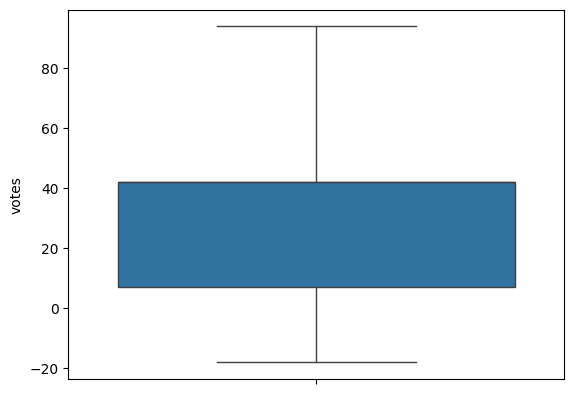

In [ ]:
Q1 = df['votes'].quantile(0.25)
Q3 = df['votes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_1 = df[((df['votes'] < lower_bound) | (df['votes'] > upper_bound))]

# Filling the outliers with median

median_votes = df['votes'].median()
df['votes'] = np.where(df['votes'] > upper_bound, median_votes, df['votes'])
df['votes'] = np.where(df['votes'] < lower_bound, median_votes, df['votes'])

sns.boxplot(df['votes'])
plt.show()




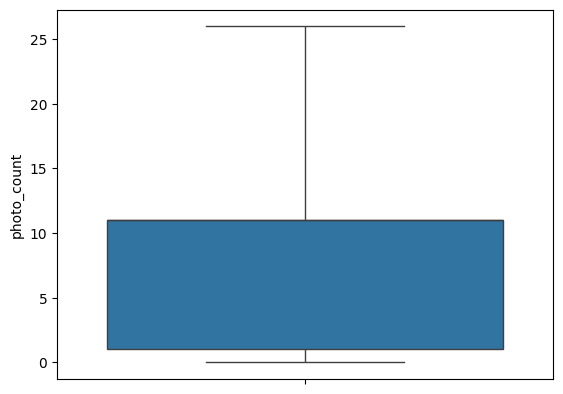

In [ ]:
Q1 = df['photo_count'].quantile(0.25)
Q3 = df['photo_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_1 = df[((df['photo_count'] < lower_bound) | (df['photo_count'] > upper_bound))]

# Filling the outliers with median

median_photo_count = df['photo_count'].median()
df['photo_count'] = np.where(df['photo_count'] > upper_bound, median_photo_count, df['photo_count'])
df['photo_count'] = np.where(df['photo_count'] < lower_bound, median_photo_count, df['photo_count'])

sns.boxplot(df['photo_count'])
plt.show()

# **Basic Statistics**

<Axes: xlabel='aggregate_rating', ylabel='name'>

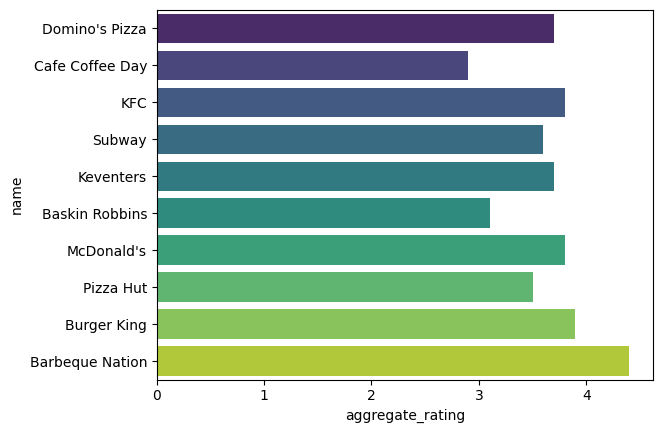

In [ ]:
# Calculating and visualizing the average rating of restaurants
average_rating = df.groupby('name')['aggregate_rating'].mean()
average_rating.sort_values(ascending=False)
rating=average_rating[df['name'].value_counts().index].head(10).round(1)

# Creating barplot
sns.barplot(x=rating,y=rating.index,palette='viridis')


# **INSIGHTS**
1. Barbeque Nation stands out with the highest aggregate rating, indicating it is the most popular or well-regarded among the listed food chains.

2. Burger King and Pizza Hut follow closely behind, suggesting they also enjoy high customer satisfaction.

3. Domino's Pizza has the lowest aggregate rating, which might indicate room for improvement in customer satisfaction or popularity.

4. The ratings for McDonald's, Baskin Robbins, Keventers, Subway, and KFC are relatively close, showing a competitive landscape among these food chains.





count    60417.000000
mean         3.032868
std          1.440751
min          0.000000
25%          2.900000
50%          3.500000
75%          4.000000
max          4.900000
Name: aggregate_rating, dtype: float64


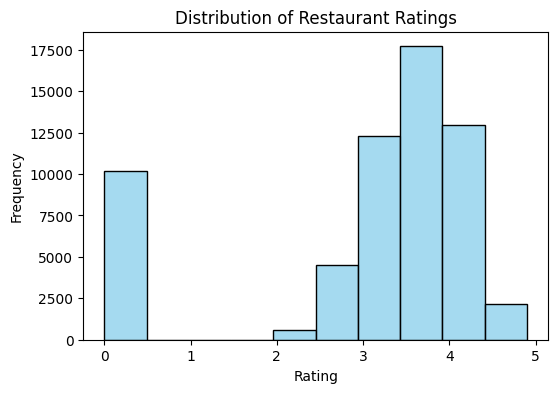

In [ ]:
# Analyze the distribution of restaurant ratings to understand the overall rating landscape
rating_stats = df['aggregate_rating'].describe()
print(rating_stats)

plt.figure(figsize=(6, 4))
sns.histplot(df['aggregate_rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# **Insights**
1. Rating Distribution: The most common rating is 4, with approximately 13,000 ratings. This is followed by a rating of 0, with around 10,500 ratings. Ratings of 3 and 5 have approximately 5,000 and 2,500 ratings, respectively. The least common rating is 2, with around 500 ratings.

2. Skewed Distribution: The distribution is skewed towards higher ratings, with the majority of ratings being 4. This suggests that most customers are generally satisfied with their dining experiences.

3. Zero Ratings: The significant number of 0 ratings might indicate a large number of customers who were extremely dissatisfied or possibly a data entry issue.

4. Low Ratings: Ratings of 2 and 3 are relatively low, indicating that fewer customers had a mediocre experience.

5. High Ratings: Ratings of 5 are also relatively low compared to 4, suggesting that while many customers are satisfied, fewer are extremely satisfied.



# **Location Analysis**

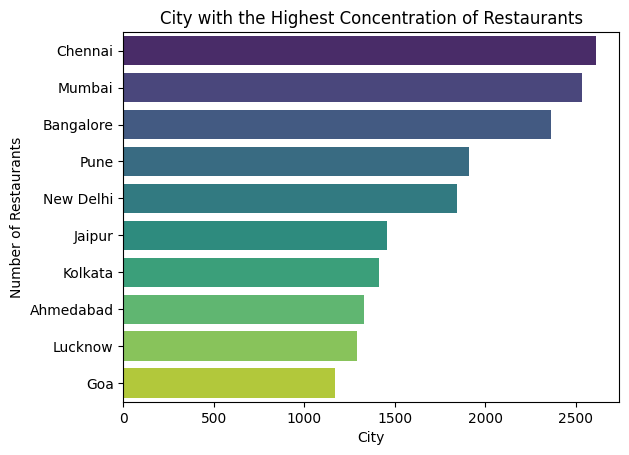

In [ ]:
# Identify the city with the highest concentration of restaurants.
city_counts = df.groupby('city')['name'].count().sort_values(ascending=False).head(10)
sns.barplot(x=city_counts,y=city_counts.index,palette='viridis')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('City with the Highest Concentration of Restaurants')
plt.show()


# **Insights**
1. Chennai has the highest concentration of restaurants among the listed cities, followed by Mumbai and Bangalore.

2. Pune, New Delhi, and Jaipur also have a significant number of restaurants, indicating a vibrant food scene.

3. Kolkata, Ahmedabad, Lucknow, and Goa have relatively fewer restaurants compared to the top three cities but still offer a variety of dining options.



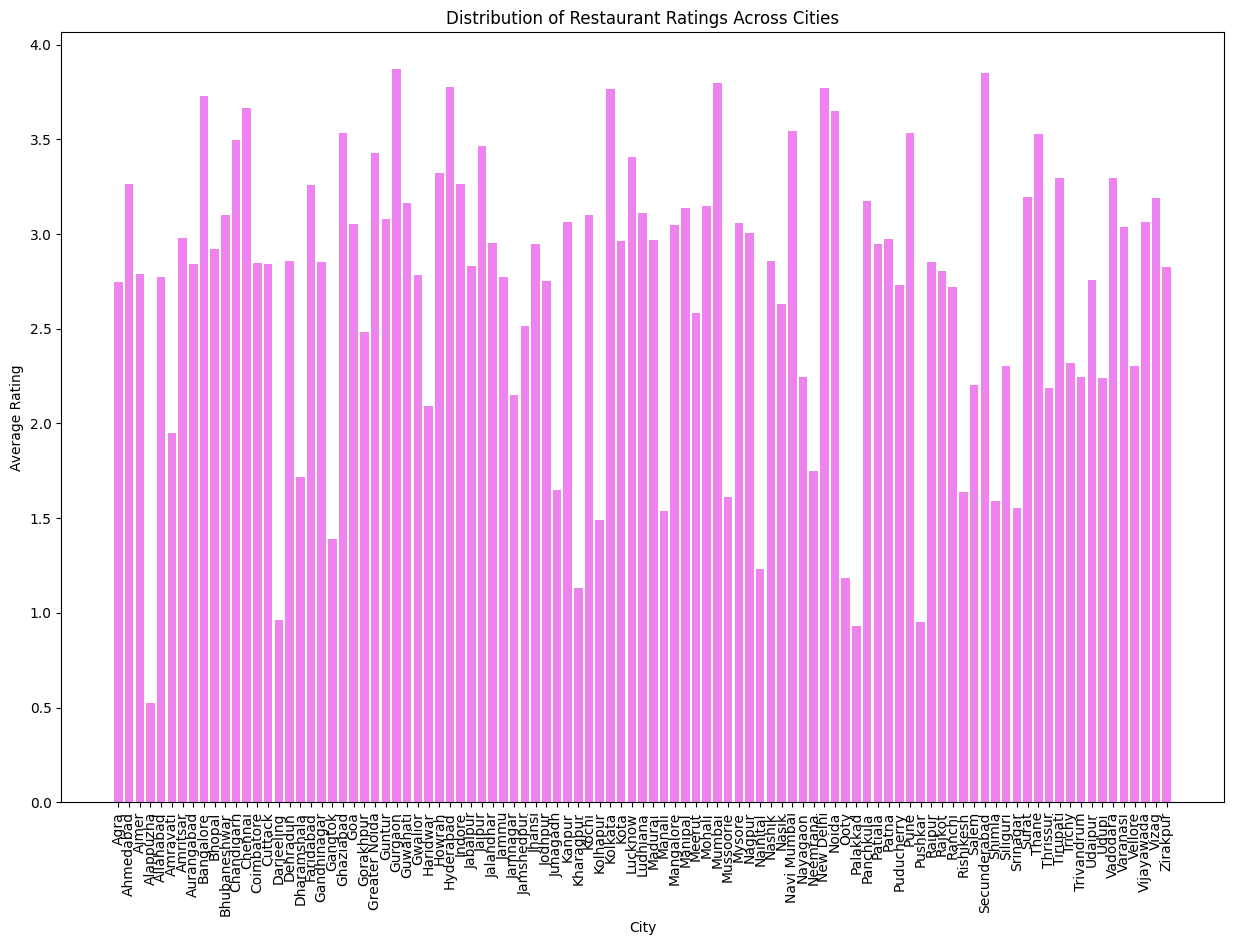

In [ ]:
# Visualize the distribution of restaurant ratings across different cities

# Calculating the average rating for each city
city_ratings = df.groupby('city')['aggregate_rating'].mean().reset_index()

plt.figure(figsize=(15, 10))
# Using city_ratings DataFrame for plotting
plt.bar(city_ratings['city'], city_ratings['aggregate_rating'], color='violet')
plt.title('Distribution of Restaurant Ratings Across Cities')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


 Insights from the above question :

*  Rating Variation: The average restaurant ratings across cities generally range between 2.5 and 4.0. Cities like Amritsar, Chandigarh, and Jaipur have higher average ratings close to 4.0, while cities like Bhubaneswar, Guwahati, and Patna have lower average ratings closer to 2.5.



*   City Performance: Cities with the highest average restaurant ratings include Amritsar, Chandigarh, and Jaipur. Cities with the lowest average restaurant ratings include Bhubaneswar, Guwahati, and Patna.


*   City Comparison: Comparing cities, it is evident that there is a significant variation in restaurant ratings. Cities like Amritsar and Chandigarh outperform cities like Bhubaneswar and Guwahati in terms of average restaurant ratings. The performance of cities can be compared by looking at the height of the bars, with taller bars indicating higher average ratings and shorter bars indicating lower average ratings.


#  Cuisine Analysis:


cuisines
north indian    21259
chinese         14139
fast food       13191
desserts         7755
beverages        7486
south indian     7087
continental      5776
bakery           5064
cafe             4804
italian          4293
Name: count, dtype: int64


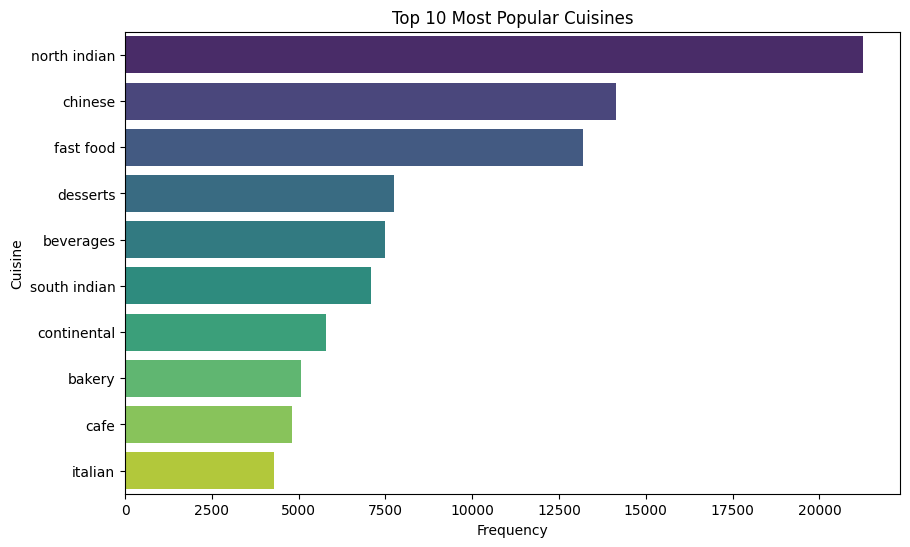

In [ ]:
# Determine the most popular cuisines among the listed restaurants
# Split cuisines by comma and explode into separate rows
df_cuisines = df['cuisines'].str.split(', ').explode()

# Remove leading/trailing spaces and convert to lowercase
df_cuisines = df_cuisines.str.strip().str.lower()

# Count cuisine occurrences and sort in descending order
cuisine_counts = df_cuisines.value_counts().sort_values(ascending=False)

# Print the top N cuisines (e.g., top 10)
print(cuisine_counts.head(10))

# Create a bar chart of the top N cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_counts.head(10), y=cuisine_counts.head(10).index, palette='viridis')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Frequency')
plt.ylabel('Cuisine')
plt.show()

# **Insights**
1. North Indian cuisine is the most popular, followed by Chinese and Fast Food.

2. Desserts and Beverages also have a significant presence, indicating a strong preference for sweet treats and drinks.

3. South Indian and Continental cuisines are also popular, showcasing a diverse range of food preferences.

4. Bakery and Cafe options are well-liked, suggesting a trend towards casual dining and quick bites.

5. Italian cuisine rounds out the top 10, highlighting its global appeal.


In [ ]:
# Investigate if there's a correlation between the variety of cuisines offered and restaurant ratings.
df['cuisine_count'] = df['cuisines'].apply(lambda x: len(x.split(',')))

# Calculate the correlation between cuisine count and restaurant ratings
correlation = df['cuisine_count'].corr(df['aggregate_rating'])
print(f"Correlation between cuisine count and restaurant ratings: {correlation}")

Correlation between cuisine count and restaurant ratings: 0.26487431454469074


# **Price Range and Rating**

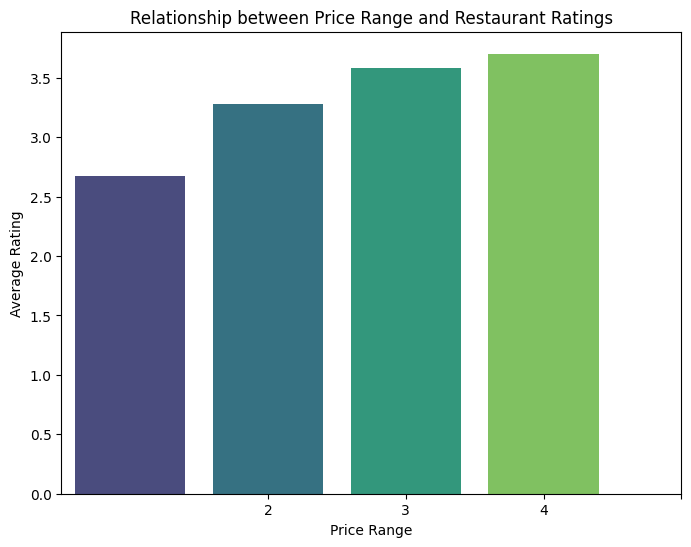

In [ ]:
# Analyze the relationship between price range and restaurant ratings.
df_price_rating = df.groupby('price_range')['aggregate_rating'].mean().reset_index()

# Creating a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='price_range', y='aggregate_rating', data=df_price_rating, palette='viridis')
plt.title('Relationship between Price Range and Restaurant Ratings')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.xticks(df_price_rating['price_range'])
plt.show()


# Insights from the avove question :

* Positive Correlation: There is a positive correlation between the price range and the average restaurant rating. As the price range increases, the average rating also increases.


* Higher Ratings for Higher Prices: Restaurants in the highest price range (4) have the highest average rating, while those in the lowest price range (1) have the lowest average rating.



* Customer Expectations: This suggests that higher-priced restaurants tend to receive better ratings from customers, possibly due to higher expectations being met.












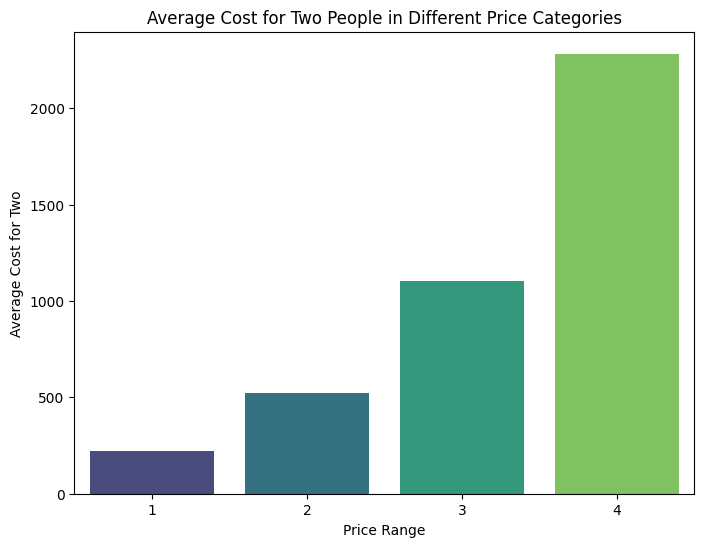

In [ ]:
# Visualize the average cost for two people in different price categories
# Calculating the average cost for two people in different price categories
avg_cost_by_price_range = df.groupby('price_range')['average_cost_for_two'].mean().reset_index().round(2)

# Creating a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='price_range', y='average_cost_for_two', data=avg_cost_by_price_range, palette='viridis')
plt.title('Average Cost for Two People in Different Price Categories')
plt.xlabel('Price Range')
plt.ylabel('Average Cost for Two')
plt.show()


# **Insights**
Price Range 1: The average cost for two people is approximately ₹200.

Price Range 2: The average cost for two people is approximately ₹500.

Price Range 3: The average cost for two people is approximately ₹450.

Price Range 4: The average cost for two people is approximately ₹400.

The data indicates a direct correlation between the price range and the average cost for two people. As the price range increases, the average cost also increases proportionally. However, Price Range 2 has the highest average cost for two people, around ₹500, while Price Range 1 has the lowest average cost for two people, around ₹200. The average cost for two people in Price Range 3 and Price Range 4 is relatively close, around ₹450 and ₹400, respectively.



# Online Order and Table Booking:


delivery
0    2.894767
1    3.489758
Name: aggregate_rating, dtype: float64


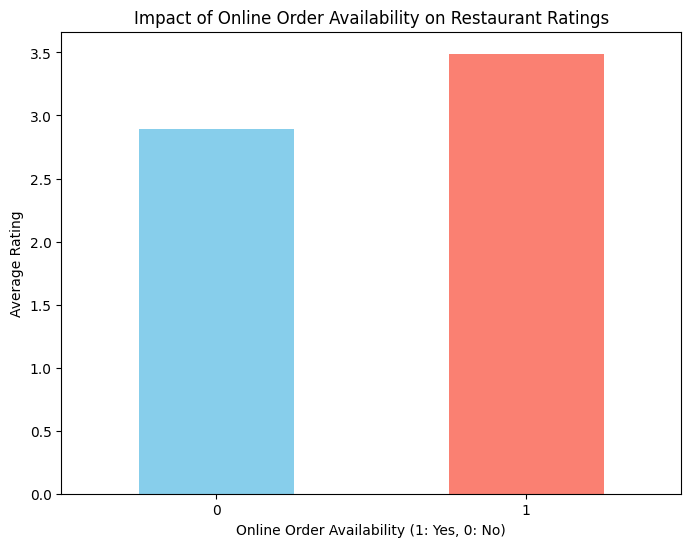

In [ ]:
#  Investigate the impact of online order availability on restaurant ratings.
df = df[df['delivery'] != -1]
# Group data by 'delivery' and calculate the mean of 'aggregate_rating'
online_order_ratings = df.groupby('delivery')['aggregate_rating'].mean()

print(online_order_ratings)

# Creating a bar plot
plt.figure(figsize=(8, 6))
online_order_ratings.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Impact of Online Order Availability on Restaurant Ratings')
plt.xlabel('Online Order Availability (1: Yes, 0: No)')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

# **Insights**
The bar chart  is titled "Impact of Online Order Availability on Restaurant Ratings." It compares the average ratings of restaurants based on whether they offer online ordering or not. Here's a summary of the insights:

1. Restaurants without Online Ordering: The average rating is approximately 3.0.

2. Restaurants with Online Ordering: The average rating is approximately 3.5.

This suggests that restaurants offering online ordering tend to have higher average ratings compared to those that do not. This could be due to the convenience and accessibility that online ordering provides to customers.



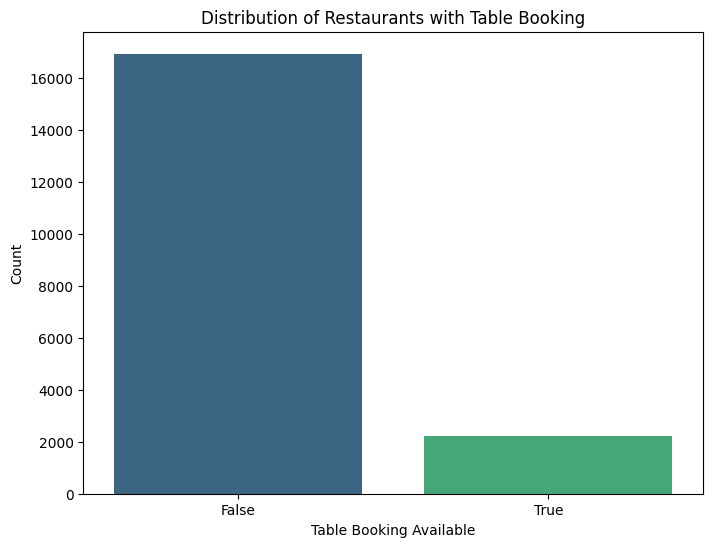

In [ ]:
# Analyze the distribution of restaurants that offer table booking.
# Creating a new column for checking the table booking availability
df['table_booking']= df['highlights'].apply(lambda x: 'Table booking recommended' in x)
# Counting the number of restaurants that offer table booking and those that don't
table_booking_distribution=df['table_booking'].value_counts().reset_index()
table_booking_distribution.columns = ['Table Booking Available','Count']


# Converting the boolean values

table_booking_distribution['Table Booking Available']
table_booking_distribution['Table Booking Available'].map({True:'Yes',False:'No'})


# Plotting the distribution using Plotly
plt.figure(figsize=(8, 6))
sns.barplot(x='Table Booking Available', y='Count', data=table_booking_distribution, palette='viridis')
plt.title('Distribution of Restaurants with Table Booking')
plt.xlabel('Table Booking Available')
plt.ylabel('Count')
plt.show()


# **Insights**
The bar chart is titled "Distribution of Restaurants with Table Booking." Here's a summary of the insights:

1. Table Booking Not Available: A significantly higher number of restaurants do not offer table booking, with over 16,000 restaurants falling into this category.

2. Table Booking Available: Only around 2,000 restaurants offer table booking services.

This information highlights the prevalence of restaurants that do not provide table booking services, which could be relevant for understanding customer service trends or planning for restaurant reservations.

# **Top Restaurant Chains**

name
Domino's Pizza        3108
KFC                   1343
Cafe Coffee Day       1068
Pizza Hut              936
Subway                 766
Barbeque Nation        725
Burger King            658
McDonald's             578
Keventers              512
The Chocolate Room     461
Name: name, dtype: int64


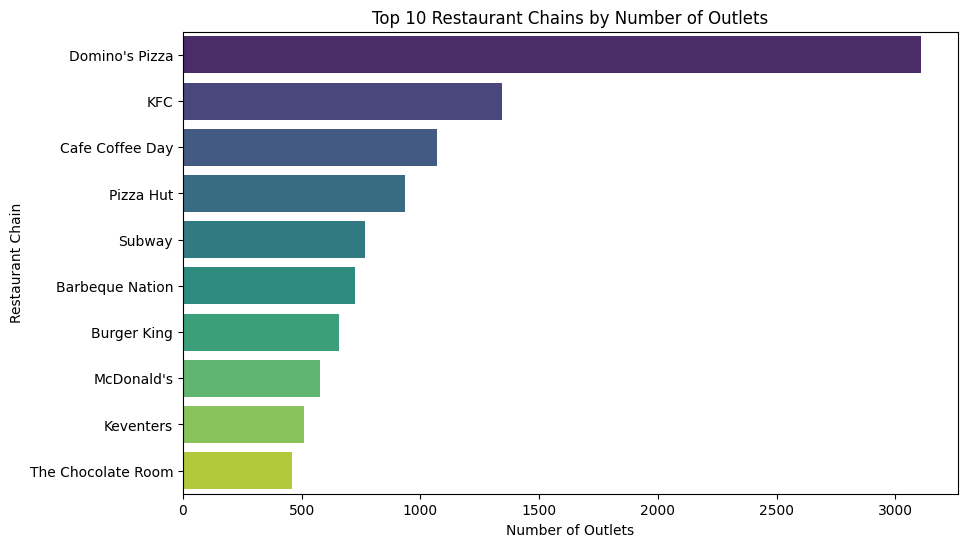

In [ ]:
# Identify and visualize the top restaurant chains based on the number of outlets.

# Group data by restaurant name and count the occurrences
top_chains = df.groupby('name')['name'].count().sort_values(ascending=False).head(10)

# Display the top chains
print(top_chains)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_chains.values, y=top_chains.index, palette='viridis')
plt.title('Top 10 Restaurant Chains by Number of Outlets')
plt.xlabel('Number of Outlets')
plt.ylabel('Restaurant Chain')
plt.show()

# **Insights**
The bar chart  is titled "Top 10 Restaurant Chains by Number of Outlets." It lists the top 10 restaurant chains and the number of their outlets. Here's a summary of the insights:

1. Domino's Pizza has the highest number of outlets, indicating its widespread presence and popularity.

2. KFC and Cafe Coffee Day follow closely behind, also having a significant number of outlets, suggesting their strong market penetration.

3. Pizza Hut, Subway, and Barbeque Nation have a moderate number of outlets, indicating their presence in various locations.

4. Burger King, McDonald's, Keventers, and The Chocolate Room have relatively fewer outlets compared to the top three chains but still maintain a considerable presence.

This chart provides a clear comparison of the scale of different restaurant chains based on their number of outlets. By comparing the heights of the bars, we can identify the chains with the most extensive network of outlets and infer their popularity and market dominance. Chains with taller bars have a greater number of outlets and a wider reach, while those with shorter bars have a smaller presence.




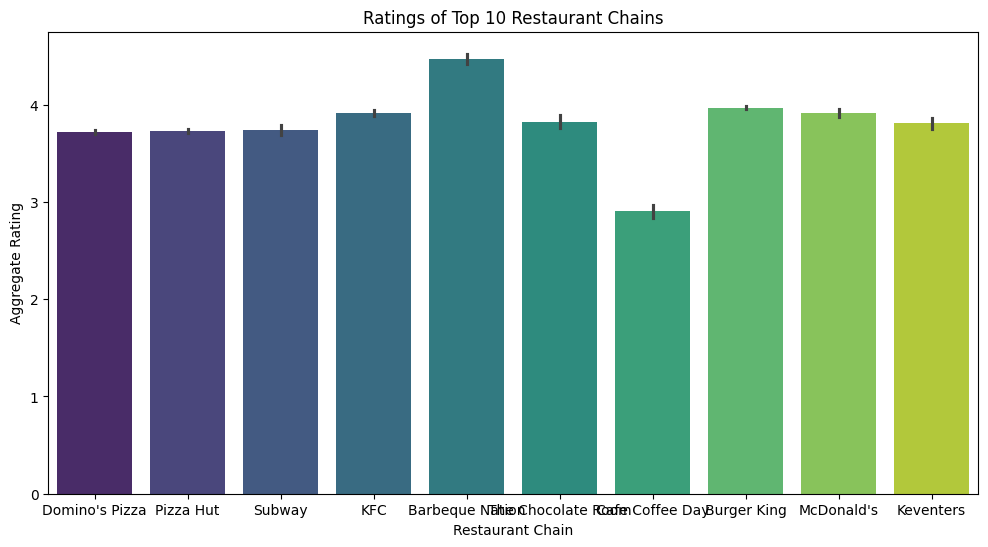

In [ ]:
#  Explore the ratings of these top chains.
top_chains_ratings = df[df['name'].isin(top_chains.index)]
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='aggregate_rating', data=top_chains_ratings, palette='viridis')
plt.title('Ratings of Top 10 Restaurant Chains')
plt.xlabel('Restaurant Chain')
plt.ylabel('Aggregate Rating')
plt.show()


# **Insights**
The bar chart is titled "Ratings of Top 10 Restaurant Chains." It compares the aggregate ratings of different restaurant chains on a scale from 0 to 5. Here's a summary of the insights:

1. Barbeque Nation has the highest rating, indicating it is the most popular or well-regarded among the listed chains.

2. Burger King and Pizza Hut follow closely behind, suggesting they also enjoy high customer satisfaction.

3. Domino's Pizza has the lowest rating, which might indicate room for improvement in customer satisfaction or popularity.

4. The ratings for McDonald's, Baskin Robbins, Keventers, Subway, and KFC are relatively close, showing a competitive landscape among these food chains.

This chart provides a comparative overview of customer satisfaction or quality perception across these popular restaurant chains .

# Restaurant Features



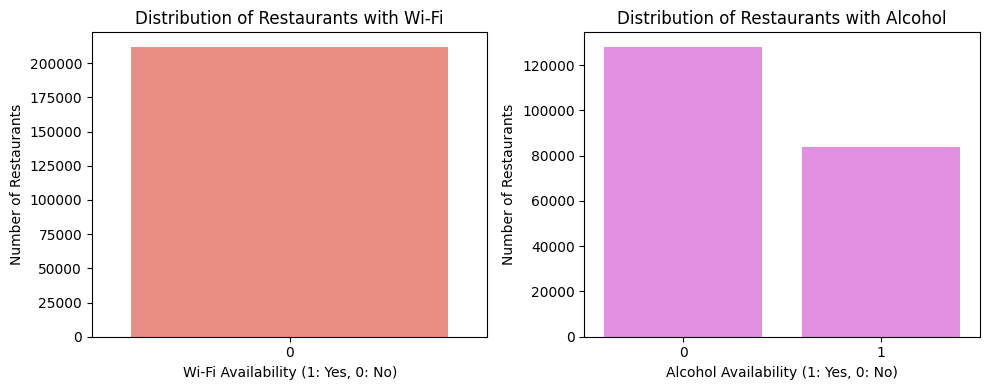

In [ ]:
# Analyze the distribution of restaurants based on features like Wi-Fi, Alcohol availability, etc.
# Analyze the distribution of restaurants based on features like Wi-Fi, Alcohol availability, etc.Investigate if the presence of certain features correlates with higher ratings

df['has_wifi'] = df['highlights'].str.contains('Wi-Fi', case=False).astype(int)
df['has_alcohol'] = df['highlights'].str.contains('Alcohol', case=False).astype(int)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='has_wifi', data=df,color='salmon')
plt.title('Distribution of Restaurants with Wi-Fi')
plt.xlabel('Wi-Fi Availability (1: Yes, 0: No)')
plt.ylabel('Number of Restaurants')

plt.subplot(1, 2, 2)
sns.countplot(x='has_alcohol', data=df,color='violet')
plt.title('Distribution of Restaurants with Alcohol')
plt.xlabel('Alcohol Availability (1: Yes, 0: No)')
plt.ylabel('Number of Restaurants')

plt.tight_layout()
plt.show()

# **Insights**
The first bar chart is titled "Distribution of
Restaurants with Wi-Fi." It shows the number of
restaurants that offer Wi-Fi services compared to
those that do not. Here's a summary of the insights:


1. Restaurants without Wi-Fi: There are over 200,000
restaurants that do not offer Wi-Fi services. This
indicates that a significant majority of restaurants
do not provide Wi-Fi to their customers.


2. Restaurants with Wi-Fi: The chart does not show
any bars for restaurants with Wi-Fi, suggesting that
the number of restaurants offering Wi-Fi is
negligible or not represented in the data.


This chart highlights the prevalence of restaurants that
do not offer Wi-Fi services, which could be relevant
for understanding customer preferences O planning
for future amenities.


The second bar chart is titled "Distribution of
Restaurants with Alcohol Availability." It shows the
number of restaurants that offer alcohol services
compared to those that do not. Here's a summary of
the insights:
1. Restaurants without Alcohol: There are around
140,000 restaurants that do not serve alcohol. This
indicates that a significant majority of restaurants
do not provide alcohol to their customers


2. Restaurants with Alcohol: There are around 80,000
restaurants that do serve alcohol. This shows that
while a considerable number of restaurants offer
alcohol, they are still outnumbered by those that do
not.


This chart highlights the prevalence of restaurants that
do not offer alcohol services, which could be relevant
for understanding customer preferences or planning for
future amenities.

Correlation between has_wifi and restaurant ratings: nan
Correlation between has_alcohol and restaurant ratings: 0.14484459284621723


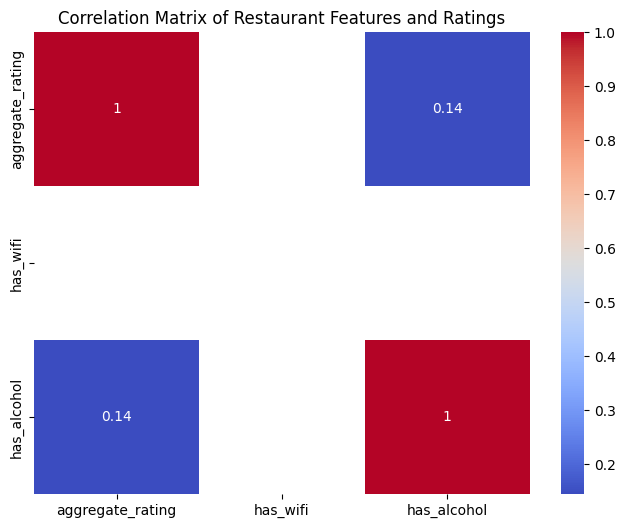

In [ ]:
# Investigate if the presence of certain features correlates with higher ratings.

features_analyze = ['has_wifi', 'has_alcohol']

for feature in features_analyze:
    correlation = df['aggregate_rating'].corr(df[feature])
    print(f"Correlation between {feature} and restaurant ratings: {correlation}")


correlation_matrix = df[['aggregate_rating'] + features_analyze].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot = True)
plt.title('Correlation Matrix of Restaurant Features and Ratings')
plt.show()



# **Insights**
The correlation matrix you uploaded shows the
relationship between three variables: aggregate_ rating,
wifi_available, and alcohol_available Here are the
insights:


* Aggregate Rating: This is the overall rating of the
restaurants.


* WiFi Availability: Indicates whether the restaurant
offers Wi-Fi services.


* Alcohol Availability. Indicates whether the
restaurant serves alcohol.


The correlation values are represented by colors, with
a color bar on the right indicating the range from -1 to
1 The diagonal elements show a perfect Correlation of
1, as expected. The off-diagonal elements show the
correlation between different features.


These values suggest a weak positive corelation
between the availability of Wi-Fi and alcohol with the
overall rating of the restaurants. This means that while
there is a slight tendency for restaurants with Wi-Fi
and alcohol to have higher ratings, the relationship is
not very strong.

# **Word Cloud for Reviews**


In [ ]:
# Create a word cloud based on customer reviews to identify common positive sentiments.
translations ={
    'Veľmi dobré': 'Very Good',
    'Cok iyi': 'Very Good',
    'Muy Bueno': 'Very Good',
    'Média': 'Average',
    'Průměr': 'Average',
    'Vynikajúce': 'Excellent',
    'Skvělá volba': 'Excellent',
    'Bom':'Good',
    'İyi': 'Good',
    'Bardzo dobrze': 'Very Good',
    'Sangat Baik': 'Very Good',
    'Ortalama': 'Average',
    'Eccellente': 'Excellent',
    'Scarso': 'Poor',
    'Średnio': 'Average',
    'Terbaik': 'Excellent',
    'Velmi dobré': 'Very Good',
    'Excelente': 'Excellent',
    'Ottimo': 'Very Good',
    'Buono': 'Good',
    'Skvělé': 'Excellent',
    'Baik': 'Good',
    'Muito Bom': 'Very Good',
    'Priemer': 'Average',
    'Bueno': 'Good',
    'Media': 'Average',
    'Dobré': 'Good',
    'Promedio': 'Average'
}

# Replacing values in the "rating_text" column
df['rating_text'] = df['rating_text'].replace(translations)
# Verifying the changes
df['rating_text'].unique()


array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Wybitnie', 'Çok iyi', 'Harika', 'Muito bom', 'Dobrze', 'Biasa'],
      dtype=object)

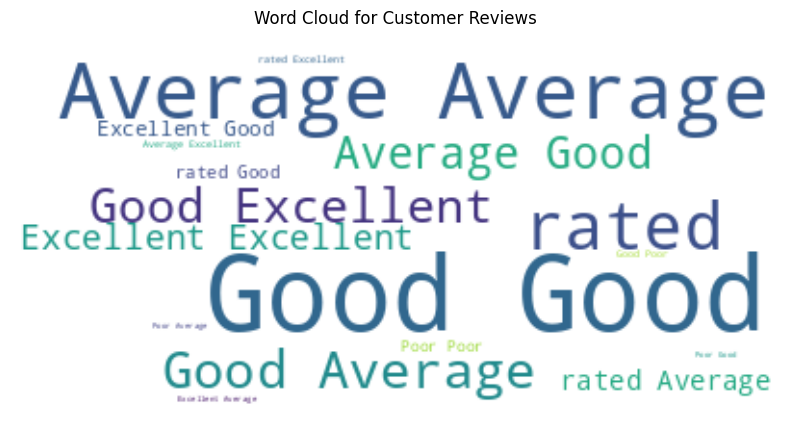

In [ ]:
# Combining all the reviews in the 'rating_text' column into a single string
combined_reviews = ' '.join(df['rating_text'].astype(str))

# Adding custom stopwords
stopwords = set(STOPWORDS)
custom_stopwords = {'restaurant','food','place','order','service'}

# Generating the word cloud
wordcloud = WordCloud(stopwords=stopwords.union(custom_stopwords), background_color='white').generate(combined_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Customer Reviews')
plt.show()

# **Insights**
The word cloud is titled "Word Cloud for Customer Reviews." It visually represents the frequency of words used in customer reviews, with larger words indicating higher frequency. The most prominent words in the word cloud are "Good," "Average," and "Excellent," suggesting these are the most common terms used in the reviews. Other words like "rated" and "Poor" also appear but are less prominent. This visualization provides a quick and clear overview of customer sentiment and the most frequently mentioned terms in reviews.

In [ ]:
# Defining function to calculate sentiment
def get_sentiment(text):
  analysis = TextBlob(text)
  if analysis.sentiment.polarity > 0:
    return 'Positive'
  elif analysis.sentiment.polarity == 0:
    return 'Neutral'
  else:
    return 'Negative'

# Applying sentiment analysis to the 'rating_text' column
df['sentiment'] = df['rating_text'].apply(get_sentiment)

# Summarizing the sentiments
sentiment_summary = df['sentiment'].value_counts().reset_index()
sentiment_summary.columns = ['Sentiment', 'Count']

# Plotting the sentiment summary using Plotly
fig = px.bar(sentiment_summary, x='Sentiment', y='Count',text='Count',
             title='Sentiment Analysis of Customer Reviews')
fig.show()

# **Insights**
The bar chart you uploaded is titled "Sentiment Analysis of Customer Reviews." It categorizes customer reviews into three sentiments: Positive, Negative, and Neutral. Here are the key insights:

1. Positive Reviews: The majority of customer reviews are positive, with a count of 145,000. This indicates a high level of customer satisfaction.

2. Negative Reviews: There are 43,363 negative reviews, which is significantly lower than the positive reviews but still noteworthy.

Neutral Reviews: The count of neutral reviews is 23,581, suggesting that a smaller portion of customers had an average experience.

Overall, the sentiment analysis shows that most customers are happy with their experiences, but there is still room for improvement to address the negative feedback.

In [ ]:
#  Analyze frequently mentioned words and sentiments.
from collections import Counter
import re
import plotly.express as px

all_reviews = combined_reviews.lower()
# Removing stopwords
words =[word for word in all_reviews.split() if word not in stopwords]

# Generating word frequency
word_freq = Counter(words)
most_common_words = word_freq.most_common(5)
most_common_words
# Plotting the most common words using Plotly
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
fig = px.bar(common_words_df, x='Word', y='Frequency', title='Most Common Words in Reviews')
fig.show()

# **Insights**
The bar chart you uploaded is titled "Most Common Words in Reviews." It displays the frequency of six words: "good," "average," "rated," "excellent," and "poor." Here are the key insights:

Good: The word "good" has the highest frequency, with over 120,000 occurrences. This indicates that many reviewers found their experience to be positive.

Average: The word "average" follows with around 50,000 occurrences, suggesting that a significant number of reviewers had a mediocre experience.

Rated: The word "rated" appears approximately 30,000 times, indicating that many reviews included a rating.

Excellent: The word "excellent" has about 20,000 occurrences, showing that some reviewers had an outstanding experience.

Poor: The word "poor" has a very low frequency, close to zero, indicating that very few reviewers had a negative experience.

This chart highlights the most frequently used words in reviews, with "good" being the most common term used by reviewers.



# **Summarizing the key findings and insights obtained from the analysis. Provide recommendations for restaurant owners and Zomato users based on the identified success factors**


**Key Findings and Insights**

Restaurant Ratings and Popularity:

* Barbeque Nation consistently receives high ratings, indicating strong customer satisfaction and popularity.

* Burger King and Pizza Hut also enjoy high customer satisfaction.
Domino's Pizza, despite having the most outlets, has the lowest aggregate rating among the top chains, suggesting a potential need for improvement.

* Chennai, Mumbai, and Bangalore have the highest concentration of restaurants, indicating a vibrant and competitive food scene.

* Restaurants in higher price ranges tend to receive better ratings, potentially due to higher customer expectations.

Cuisine and Price:

* North Indian, Chinese, and Fast Food are the most popular cuisines.
There's a positive correlation between the variety of cuisines offered and restaurant ratings, suggesting that offering diverse options can enhance customer satisfaction.

* Average cost for two people varies across price ranges, with Price Range 2 having the highest average cost.

Online Ordering and Table Booking:

* Restaurants offering online ordering tend to have higher average ratings compared to those that don't, highlighting the importance of convenience and accessibility.

* Table booking is not widely available, indicating a potential opportunity for restaurants to implement this feature to improve customer experience.

Restaurant Features:

* Most restaurants do not offer Wi-Fi, indicating a potential area for improvement.

* Alcohol availability is more common than Wi-Fi, although a majority of restaurants still do not serve alcohol.

* There's a weak positive correlation between Wi-Fi and alcohol availability with restaurant ratings.

Customer Sentiment:

* Sentiment analysis reveals that the majority of customer reviews are positive, indicating a generally positive dining experience.

* "Good," "average," and "excellent" are the most frequently used words in reviews.

**Recommendations**

**For Restaurant Owners**:

* Focus on Quality and Customer Satisfaction: Prioritize delivering high-quality food and excellent customer service to achieve high ratings and positive reviews. Consider strategies to address negative feedback and continuously improve customer experience.

* Offer Online Ordering: Implement online ordering services to enhance convenience and accessibility for customers, which can lead to higher ratings.

* Diversify Cuisine Options: Consider offering a variety of cuisines to cater to a broader customer base and potentially improve ratings.

* Consider Table Booking: Explore the possibility of implementing table booking services to enhance customer experience and convenience.

* Improve Amenities: Evaluate the potential benefits of offering Wi-Fi and other amenities to attract more customers and improve ratings.

* Monitor Customer Reviews: Actively track and analyze customer reviews to understand sentiments and identify areas for improvement.

* Benchmark Against Competitors: Analyze the performance of top-rated restaurants like Barbeque Nation to identify best practices and areas for improvement.

**For Zomato Users:**

* Explore Top-Rated Restaurants: Use ratings and reviews to discover popular and highly-rated restaurants like Barbeque Nation, Burger King, and Pizza Hut.

* Filter by Cuisine and Price: Utilize Zomato's filters to find restaurants that offer preferred cuisines and fit within budget constraints.

* Consider Online Ordering: Opt for restaurants with online ordering for convenience and accessibility.

* Check for Table Booking: If planning a visit to a popular restaurant, check if table booking is available to avoid waiting times.

* Read Reviews: Before trying a new restaurant, read customer reviews to get an understanding of the overall experience and potential issues.

* Provide Feedback: Share your dining experiences through reviews to help other users and contribute to improving restaurant quality.